In [4]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import ipywidgets as widget
from IPython.display import display
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


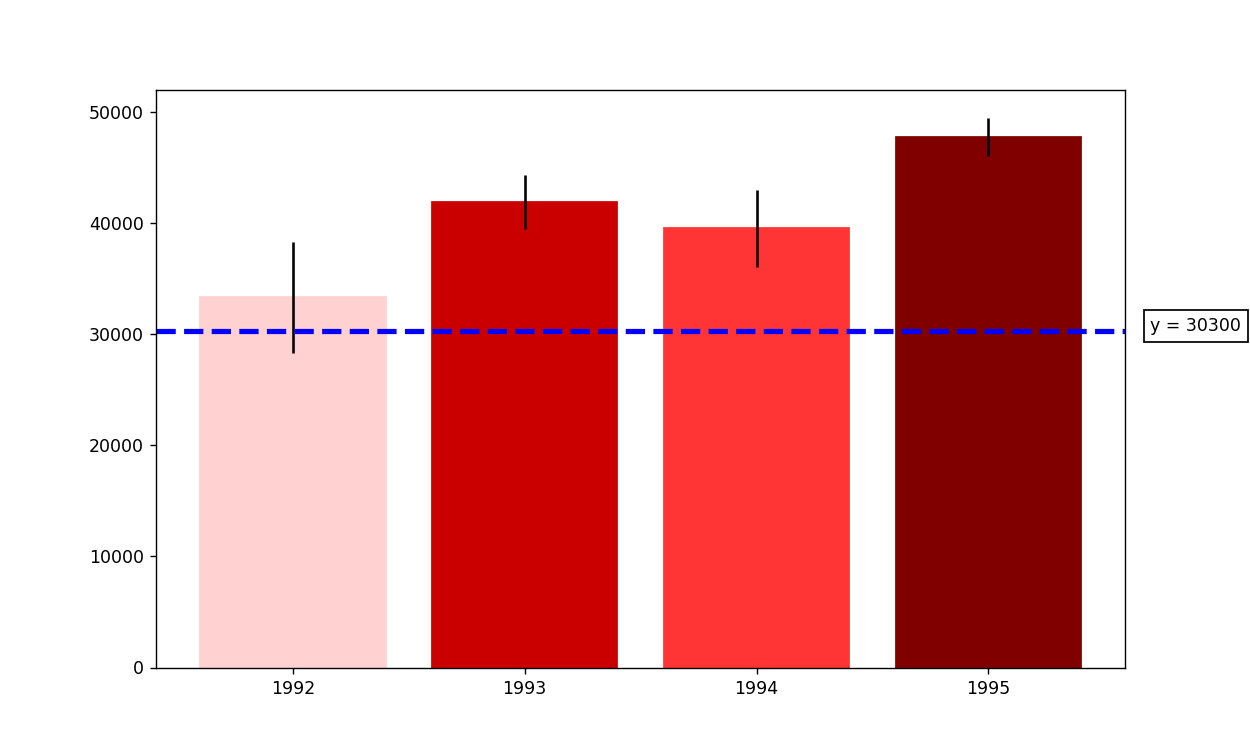

interactive(children=(IntSlider(value=30000, description='y', layout=Layout(width='750px'), max=100000, step=1…

<function __main__.onchange(y)>

In [5]:
#mean and standar error debiation
mean = df.mean(axis=1)
std_err = df.sem(axis=1)

#initial value of y
initial_y = 35000

normal = Normalize(vmin=-10, vmax=10)
cmap = get_cmap('seismic')
df_color = pd.DataFrame()
df_color['intesity'] = normal((mean.values-initial_y)/std_err.values)
df_color['color'] = [cmap(x) for x in df_color['intesity']]

plt.figure(figsize=(10,6))
bar = plt.bar(df.index, mean, yerr=std_err*1.5, color=df_color.color)
horizontal = plt.axhline(y=initial_y, color='blue', linewidth=3, linestyle='--')
y_text = plt.text(1995.7, initial_y, 'y=%d' %initial_y, bbox=dict(facecolor='none', edgecolor='black'))
plt.xticks(df.index, ['1992', '1993', '1994', '1995'])

def onchange(y):
    for i in range(4):
        shade = cmap(normal((mean.values[i]-y)/std_err.values[i]))
        bar[i].set_color(shade) 
    horizontal.set_ydata(y)
    y_text.set_text('y = %d' % y);
    y_text.set_position((1995.7, y));
    
# plt.gcf().canvas.mpl_connect('button_release_event', onclick);
y_value = widget.IntSlider(value=30000, min=0, max=100000, step=100, orientation='horizontal')
y_value.layout.width = '750px'
widget.interact(onchange, y=y_value)